In [1]:
import imageio
import keras
from keras.models import load_model
import tools
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
#config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 56} ) 
#sess = tf.Session(config=config) 
#keras.backend.set_session(sess)


def normalize_MNIST_images(x):
    x = x.astype('float64')
    x = x*((2.0/255))-1
    return x

/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
net_1 = load_model('./models/net_1.h5')
net_2 = load_model('./models/net_2.h5')
net_3 = load_model('./models/net_3.h5')


In [3]:
xtrain,ltrain = tools.load(dataset = "training", path = "./FashionMNIST")
xtest, ltest  = tools.load(dataset = "testing",  path = "./FashionMNIST")
test=xtrain[:,9]
test=test.reshape(28, 28)
import png
f = open('./models/ramp.png', 'wb')      # binary mode is important
w = png.Writer(28, 28, greyscale=True)
w.write(f, test)
f.close()

In [4]:
im = imageio.imread('./models/ramp.png')
im.shape

(28, 28)

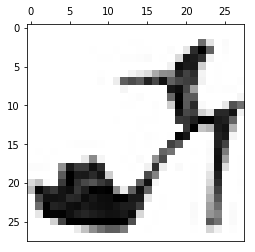

In [5]:
tools.show (im)

In [6]:
label_dict={0: 'T-shirt/top',1: 'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5: 'Sandal',6: 'Shirt',7: 'Sneaker',8: 'Bag',9:'Ankle boot' }
test_normalized = normalize_MNIST_images(im)
test_final = test_normalized.reshape(1,28,28,1)

In [7]:
def test_on_image(image =test_final ,model_1=net_1,model_2=net_2,model_3=net_3):
    pred1 = model_1.predict(image)
    pred2 = model_2.predict(image)
    pred3 = model_3.predict(image)
    predCombined=(pred1+pred2+pred3).T.argmax(axis=0)
    print(label_dict[predCombined[0]])

In [8]:
test_on_image()

Sandal
